<a href="https://colab.research.google.com/github/SamriddhiMishra/Smartknower-ML-Internship/blob/master/ML%20models/Major%20Project/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Import Dataset

In [3]:
df = pd.read_csv('/content/drive/My Drive/Smartknower ML Intern/Major Project/Amazon Review.csv')
df.head()

,Rating,Text
0,5.0,This product so far has not disappointed. My c...
1,5.0,great for beginner or experienced person. Boug...
2,5.0,Inexpensive tablet for him to use and learn on...
3,4.0,I've had my Fire HD 8 two weeks now and I love...
4,5.0,I bought this for my grand daughter when she c...


In [4]:
df[df['Rating'] == 2.0]

,Rating,Text
117,2.0,Didn't have some of the features I was looking...
281,2.0,Not a good product short battery life i can on...
444,2.0,"If you shop on Amazon all the time, this will ..."
446,2.0,fire tablet is very powerful for the size and ...
635,2.0,I have always gone to buy a kindle because I l...
...,...,...
34420,2.0,After about two weeks I ended up returning thi...
34452,2.0,I previously owned the previous model. There i...
34611,2.0,Does not load up CNN or Travel channel.I even ...
34614,2.0,We had two AppleTVs - one in the master bedroo...


In [5]:
df['Text'][117]

"Didn't have some of the features I was looking for. Returned it the next day. May be good for others"

## Analyzing Data and Preprocessing

In [7]:
df.shape

(34660, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  34627 non-null  float64
 1   Text    34659 non-null  object 
dtypes: float64(1), object(1)
memory usage: 541.7+ KB


In [9]:
df.isnull().sum()

Rating    33
Text       1
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34626 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  34626 non-null  float64
 1   Text    34626 non-null  object 
dtypes: float64(1), object(1)
memory usage: 811.5+ KB


In [12]:
df.isnull().sum()

Rating    0
Text      0
dtype: int64

In [13]:
df.shape

(34626, 2)

## Setting Input and Output

In [14]:
df['Text'] = df['Text'].fillna(' ')
X = df.iloc[:,1].values
X

array(['This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.',
       'great for beginner or experienced person. Bought as a gift and she loves it',
       'Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...',
       ...,
       "Love my Kindle Fire but I am really disappointed in the Kindle Power Fast Charging Unit. I've had it two months and I've used it many times - The first two times it worked okay but failerd on the third and many subsequent tries. I've disposed of it and use my wife's iPad Nano charger which always works just fine.",
       "I was surprised to find it did not come with any type of charging cords so I had to purchase one and then found my Sprint HTC 3D charger is faster. I would not purchase again- 1st item I've ever not liked I've purchased from Amazon",
       "to spite the fact that i have n

In [15]:
y = df.iloc[:,0].values
y

array([5., 5., 5., ..., 1., 1., 1.])

## Preprocessing for Improvement

Try 1- Creating one column in dataframe such that rating from 0-2 considered as 0 whereas 3-5 as 1

In [16]:
df['Rating'].value_counts()

5.0    23774
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: Rating, dtype: int64

In [17]:
df['Rating'].value_counts().index[0]

5.0

In [18]:
df["sentiment"] = 1

In [19]:
df.head(20)

,Rating,Text,sentiment
0,5.0,This product so far has not disappointed. My c...,1
1,5.0,great for beginner or experienced person. Boug...,1
2,5.0,Inexpensive tablet for him to use and learn on...,1
3,4.0,I've had my Fire HD 8 two weeks now and I love...,1
4,5.0,I bought this for my grand daughter when she c...,1
5,5.0,This amazon fire 8 inch tablet is the perfect ...,1
6,4.0,"Great for e-reading on the go, nice and light ...",1
7,5.0,"I gave this as a Christmas gift to my inlaws, ...",1
8,5.0,Great as a device to read books. I like that i...,1
9,5.0,I love ordering books and reading them with th...,1


In [20]:
df.loc[df['Rating']<=3, 'sentiment'] = 0

In [21]:
df['sentiment'].value_counts()

1    32315
0     2311
Name: sentiment, dtype: int64

In [22]:
y = df.iloc[:,2].values
y

array([1, 1, 1, ..., 0, 0, 0])

## Splitting data into Train and Test set

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(y_test.shape)

(27700,)
(6926,)


## Creating Pipeline

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud, STOPWORDS 


In [25]:
text_model = Pipeline([('tfidf',TfidfVectorizer(binary = True,max_df=0.611111111111111,norm = 'l2')),('model',MultinomialNB(alpha = 0.058,fit_prior=True))])

In [26]:
text_model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=True,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.611111111111111,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 MultinomialNB(alpha=0.058, class_prior=None, fit_prior=True))],
         verbose=F

In [27]:
y_pred = text_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [28]:
#y_pred = text_model.predict(["Bad"])
#y_pred

In [29]:
#y_pred = text_model.predict(["Very bad"])
#y_pred

In [30]:
counts = np.bincount(y_pred)
print(counts)

[  53 6873]


In [31]:
counts = np.bincount(y_test)
print(counts)

[ 443 6483]


In [32]:
np.argmax(0)

0

In [33]:
counts = np.bincount(y_pred)
print(np.argmax(counts))

1


## Evaluation of model

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
print("Accuracy is - ",accuracy_score(y_test,y_pred)*100)
print("f1 score -", f1_score(y_test, y_pred))
print("Classification Report -")
print(classification_report(y_test, y_pred))

Accuracy is -  93.87814034074502
f1 score - 0.9682539682539683
Classification Report -
              precision    recall  f1-score   support

           0       0.68      0.08      0.15       443
           1       0.94      1.00      0.97      6483

    accuracy                           0.94      6926
   macro avg       0.81      0.54      0.56      6926
weighted avg       0.92      0.94      0.92      6926



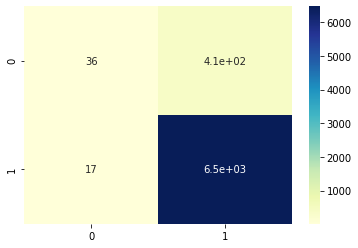

In [35]:
sns.heatmap(confusion_matrix(y_test,y_pred),cmap='YlGnBu',annot=True)

## Applying k-Fold Cross Validation

In [36]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer,accuracy_score,precision_score,recall_score,f1_score
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}
results = cross_validate(estimator = text_model, X = X_train, y = y_train, cv = 10,scoring = scoring)
#print(results)
print("Accuracy: {:.2f} %".format(results['test_accuracy'].mean()*100))
print("Precision: {:.5f} ".format(results['test_precision'].mean()))
print("Recall: {:.5f} ".format(results['test_recall'].mean()))
print("f1_score: {:.5f} ".format(results['test_f1_score'].mean()))
print("Standard Deviation: {:.2f} ".format(results['test_accuracy'].std()*100))

Accuracy: 93.57 %
Precision: 0.93699 
Recall: 0.99818 
f1_score: 0.96662 
Standard Deviation: 0.15 


## Grid Search

In [37]:
'''from sklearn.model_selection import GridSearchCV
grid_params = {
  
  'model__alpha': np.linspace(0.5, 1.5, 6),
  'model__fit_prior': [True, False],
  'tfidf__max_df': np.linspace(0.1, 1, 10),
  'tfidf__binary': [True, False],
  'tfidf__norm': [None, 'l1', 'l2'], 
}
clf = GridSearchCV(estimator = text_model,
                           param_grid = grid_params,
                           scoring = 'f1',
                           cv = 10,
                           n_jobs = -1)
clf.fit(X_train, y_train)
print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)'''

'from sklearn.model_selection import GridSearchCV\ngrid_params = {\n  \n  \'model__alpha\': np.linspace(0.5, 1.5, 6),\n  \'model__fit_prior\': [True, False],\n  \'tfidf__max_df\': np.linspace(0.1, 1, 10),\n  \'tfidf__binary\': [True, False],\n  \'tfidf__norm\': [None, \'l1\', \'l2\'], \n}\nclf = GridSearchCV(estimator = text_model,\n                           param_grid = grid_params,\n                           scoring = \'f1\',\n                           cv = 10,\n                           n_jobs = -1)\nclf.fit(X_train, y_train)\nprint("Best Score: ", clf.best_score_)\nprint("Best Params: ", clf.best_params_)'

## Visualisation

In [38]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

In [39]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df['Text']:
  val = str(val) 
  tokens = val.split() 

  for i in range(len(tokens)): 
    tokens[i] = tokens[i].lower()     
  comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = stopwords, 
                      min_font_size = 10).generate(comment_words)

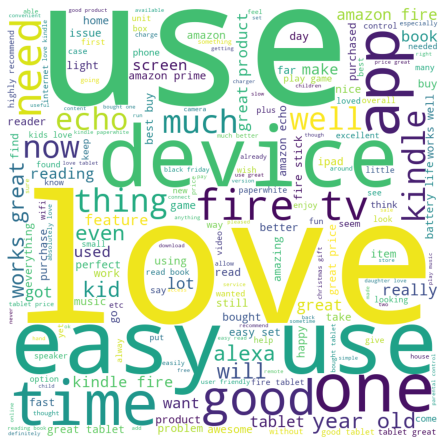

In [40]:
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## Saving the model

In [41]:
#import joblib
#joblib.dump(text_model, 'model.pkl') 